In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')


In [3]:
X = dataset.iloc[:, 3:5].values

C:\Anaconda3\envs\aiml\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:453: UserWarning: Exited at iteration 2000 with accuracies 
[2.19753073e-14 6.44837021e-07 1.69662116e-06 1.26290726e-06
 1.77829733e-06 1.29733862e-06 6.73800004e-07 1.08327117e-06
 1.40360865e-05]
not reaching the requested tolerance 2.9802322387695312e-06.
Use iteration 1454 instead with accuracy 
1.7003688145379862e-06.

  _, diffusion_map = lobpcg(
C:\Anaconda3\envs\aiml\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:453: UserWarning: Exited postprocessing with accuracies 
[7.26838699e-15 5.77004395e-07 1.77898601e-06 1.41030510e-06
 2.10053651e-06 1.48760431e-06 8.93656835e-07 1.31026572e-06
 5.74496340e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
  _, diffusion_map = lobpcg(
C:\Anaconda3\envs\aiml\Lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  retur

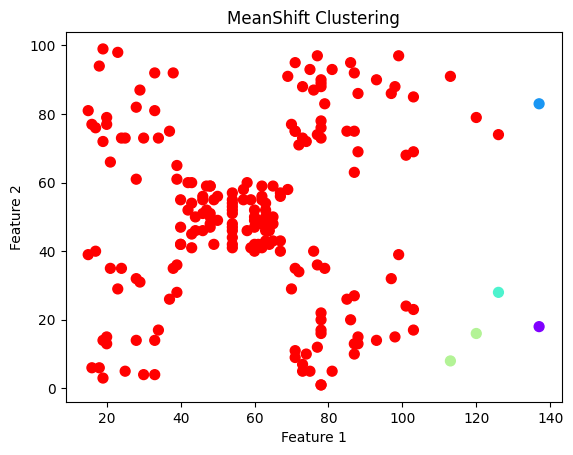

In [34]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=8,assign_labels='kmeans',affinity='rbf',random_state=0).fit(X)
re=clustering.fit(X)
labels = re.labels_


plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=50)
plt.title("MeanShift Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [35]:
labels

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 4, 6, 3, 6,
       1, 2], dtype=int32)

In [36]:
supervised=dataset

In [37]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,6
1,2,Male,21,15,81,6
2,3,Female,20,16,6,6
3,4,Female,23,16,77,6
4,5,Female,31,17,40,6
...,...,...,...,...,...,...
195,196,Female,35,120,79,6
196,197,Female,45,126,28,3
197,198,Male,32,126,74,6
198,199,Male,32,137,18,1


In [38]:
supervised['Cluster_group']=labels

In [39]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,6
1,2,Male,21,15,81,6
2,3,Female,20,16,6,6
3,4,Female,23,16,77,6
4,5,Female,31,17,40,6
...,...,...,...,...,...,...
195,196,Female,35,120,79,6
196,197,Female,45,126,28,3
197,198,Male,32,126,74,6
198,199,Male,32,137,18,1


C:\Anaconda3\envs\aiml\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


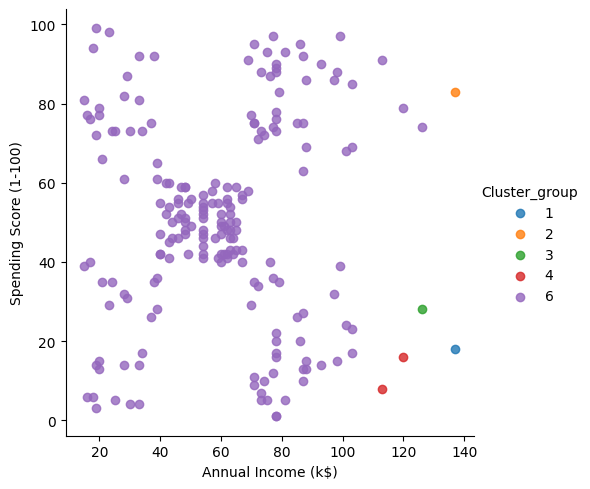

In [40]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)

In [41]:
supervised.to_csv("cluster.csv",index=False)